In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

### 1. Uploading dataset

In [13]:
# Dataaset by education level
df_edu= pd.read_csv("MWA27.20230614T090606.csv")
df_edu

,Statistic Label,Education Level,NMW earnings status,Quarter,UNIT,VALUE
0,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2016Q2,Thousand,196.4
1,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2016Q3,Thousand,183.1
2,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2016Q4,Thousand,154.3
3,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2017Q1,Thousand,140.3
4,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2017Q2,Thousand,131.7
...,...,...,...,...,...,...
571,Employees aged 15 years and over,Other/not stated,Total employees,2019Q3,Thousand,58.3
572,Employees aged 15 years and over,Other/not stated,Total employees,2019Q4,Thousand,56.5
573,Employees aged 15 years and over,Other/not stated,Total employees,2020Q1,Thousand,57.0
574,Employees aged 15 years and over,Other/not stated,Total employees,2020Q2,Thousand,38.5


In [14]:
# Dataset by nationality
df_nat=pd.read_csv("MWA25.20230614T090635.csv")
df_nat

,Statistic Label,Nationality,NMW earnings status,Quarter,UNIT,VALUE
0,Employees aged 15 years and over,Total Persons,Employees reporting earning National Minimum W...,2016Q2,Thousand,196.4
1,Employees aged 15 years and over,Total Persons,Employees reporting earning National Minimum W...,2016Q3,Thousand,183.1
2,Employees aged 15 years and over,Total Persons,Employees reporting earning National Minimum W...,2016Q4,Thousand,154.3
3,Employees aged 15 years and over,Total Persons,Employees reporting earning National Minimum W...,2017Q1,Thousand,140.3
4,Employees aged 15 years and over,Total Persons,Employees reporting earning National Minimum W...,2017Q2,Thousand,131.7
...,...,...,...,...,...,...
415,Employees aged 15 years and over,Other nationals,Total employees,2018Q4,Thousand,118.0
416,Employees aged 15 years and over,Other nationals,Total employees,2019Q1,Thousand,121.2
417,Employees aged 15 years and over,Other nationals,Total employees,2019Q2,Thousand,129.7
418,Employees aged 15 years and over,Other nationals,Total employees,2019Q3,Thousand,132.8


In [19]:
# Dataset by worked hours
df_hours=pd.read_csv("MWA15.20230614T090604.csv")
df_hours

,Statistic Label,NMW earnings status,Usual Hours Worked,Quarter,UNIT,VALUE
0,Employees aged 15 years and over,Employees reporting earning National Minimum W...,Usual hours worked,2016Q2,Thousand,196.4
1,Employees aged 15 years and over,Employees reporting earning National Minimum W...,Usual hours worked,2016Q3,Thousand,183.1
2,Employees aged 15 years and over,Employees reporting earning National Minimum W...,Usual hours worked,2016Q4,Thousand,154.3
3,Employees aged 15 years and over,Employees reporting earning National Minimum W...,Usual hours worked,2017Q1,Thousand,140.3
4,Employees aged 15 years and over,Employees reporting earning National Minimum W...,Usual hours worked,2017Q2,Thousand,131.7
...,...,...,...,...,...,...
643,Employees aged 15 years and over,Total employees,Variable hours (see note),2019Q3,Thousand,71.3
644,Employees aged 15 years and over,Total employees,Variable hours (see note),2019Q4,Thousand,70.5
645,Employees aged 15 years and over,Total employees,Variable hours (see note),2020Q1,Thousand,59.4
646,Employees aged 15 years and over,Total employees,Variable hours (see note),2020Q2,Thousand,49.7


In [15]:
# Dataset by economic sector
df_sector=pd.read_csv("MWA07.csv")
df_sector

,Statistic Label,NACE Rev 2 Economic Sector,NMW earnings status,Quarter,UNIT,VALUE
0,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2016Q2,Thousand,196.4
1,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2016Q3,Thousand,183.1
2,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2016Q4,Thousand,154.3
3,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2017Q1,Thousand,140.3
4,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2017Q2,Thousand,131.7
...,...,...,...,...,...,...
1291,Employees aged 15 years and over,Not stated,Total employees,2019Q3,Thousand,5.3
1292,Employees aged 15 years and over,Not stated,Total employees,2019Q4,Thousand,5.9
1293,Employees aged 15 years and over,Not stated,Total employees,2020Q1,Thousand,NaN
1294,Employees aged 15 years and over,Not stated,Total employees,2020Q2,Thousand,NaN


In [16]:
df_sector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Statistic Label             1296 non-null   object 
 1   NACE Rev 2 Economic Sector  1296 non-null   object 
 2   NMW earnings status         1296 non-null   object 
 3   Quarter                     1296 non-null   object 
 4   UNIT                        1296 non-null   object 
 5   VALUE                       1094 non-null   float64
dtypes: float64(1), object(5)
memory usage: 60.9+ KB


In [18]:
df_sector.describe

<bound method NDFrame.describe of                        Statistic Label NACE Rev 2 Economic Sector  \
0     Employees aged 15 years and over  All NACE economic sectors   
1     Employees aged 15 years and over  All NACE economic sectors   
2     Employees aged 15 years and over  All NACE economic sectors   
3     Employees aged 15 years and over  All NACE economic sectors   
4     Employees aged 15 years and over  All NACE economic sectors   
...                                ...                        ...   
1291  Employees aged 15 years and over                 Not stated   
1292  Employees aged 15 years and over                 Not stated   
1293  Employees aged 15 years and over                 Not stated   
1294  Employees aged 15 years and over                 Not stated   
1295  Employees aged 15 years and over                 Not stated   

                                    NMW earnings status Quarter      UNIT  \
0     Employees reporting earning National Minimum W...  201

In [24]:
# Combined dataset
df=pd.read_excel("Data.xlsx")
df

,Quarter(hours),Usual Hours Worked,VALUE (thousand),NMW earnings status (hours),Quarter(national),Nationality,NMW earnings status (nat),VALUE (thousand).1,Quarter (edu),Education Level,NMW earnings status (edu),VALUE (edu),Year (sector),Broad Nationality Group (sector),Sex (sector),Industry Sector NACE Rev 2,VALUE (sector)
0,2016Q2,Usual hours worked,196.4,Employees reporting earning National Minimum W...,2016Q2,Total Persons,Employees reporting earning National Minimum W...,196.4,2016Q2,All levels of education,Employees reporting earning National Minimum W...,196.4,2005,All nationalities,Both sexes,"Agriculture, forestry and fishing (A)",5116.0
1,2016Q3,Usual hours worked,183.1,Employees reporting earning National Minimum W...,2016Q3,Total Persons,Employees reporting earning National Minimum W...,183.1,2016Q3,All levels of education,Employees reporting earning National Minimum W...,183.1,2006,All nationalities,Both sexes,"Agriculture, forestry and fishing (A)",6032.0
2,2016Q4,Usual hours worked,154.3,Employees reporting earning National Minimum W...,2016Q4,Total Persons,Employees reporting earning National Minimum W...,154.3,2016Q4,All levels of education,Employees reporting earning National Minimum W...,154.3,2007,All nationalities,Both sexes,"Agriculture, forestry and fishing (A)",6705.0
3,2017Q1,Usual hours worked,140.3,Employees reporting earning National Minimum W...,2017Q1,Total Persons,Employees reporting earning National Minimum W...,140.3,2017Q1,All levels of education,Employees reporting earning National Minimum W...,140.3,2008,All nationalities,Both sexes,"Agriculture, forestry and fishing (A)",6863.0
4,2017Q2,Usual hours worked,131.7,Employees reporting earning National Minimum W...,2017Q2,Total Persons,Employees reporting earning National Minimum W...,131.7,2017Q2,All levels of education,Employees reporting earning National Minimum W...,131.7,2009,All nationalities,Both sexes,"Agriculture, forestry and fishing (A)",6154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,American (US),Female,Employer NACE not known,177.0
6758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,American (US),Female,Employer NACE not known,283.0
6759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,American (US),Female,Employer NACE not known,119.0
6760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,American (US),Female,Employer NACE not known,127.0


In [49]:
df.describe

<bound method NDFrame.describe of      Quarter(hours)  Usual Hours Worked  VALUE (thousand)  \
0            2016Q2  Usual hours worked             196.4   
1            2016Q3  Usual hours worked             183.1   
2            2016Q4  Usual hours worked             154.3   
3            2017Q1  Usual hours worked             140.3   
4            2017Q2  Usual hours worked             131.7   
...             ...                 ...               ...   
6757            NaN                 NaN               NaN   
6758            NaN                 NaN               NaN   
6759            NaN                 NaN               NaN   
6760            NaN                 NaN               NaN   
6761            NaN                 NaN               NaN   

                            NMW earnings status (hours) Quarter(national)  \
0     Employees reporting earning National Minimum W...            2016Q2   
1     Employees reporting earning National Minimum W...            2016Q3   
2 

In [50]:
df.info

<bound method DataFrame.info of      Quarter(hours)  Usual Hours Worked  VALUE (thousand)  \
0            2016Q2  Usual hours worked             196.4   
1            2016Q3  Usual hours worked             183.1   
2            2016Q4  Usual hours worked             154.3   
3            2017Q1  Usual hours worked             140.3   
4            2017Q2  Usual hours worked             131.7   
...             ...                 ...               ...   
6757            NaN                 NaN               NaN   
6758            NaN                 NaN               NaN   
6759            NaN                 NaN               NaN   
6760            NaN                 NaN               NaN   
6761            NaN                 NaN               NaN   

                            NMW earnings status (hours) Quarter(national)  \
0     Employees reporting earning National Minimum W...            2016Q2   
1     Employees reporting earning National Minimum W...            2016Q3   
2   

In [54]:
df.shape

(6762, 17)

In [55]:
df.dtypes

Quarter(hours)                       object
Usual Hours Worked                   object
VALUE (thousand)                    float64
NMW earnings status (hours)          object
Quarter(national)                    object
Nationality                          object
NMW earnings status (nat)            object
VALUE (thousand).1                  float64
Quarter (edu)                        object
Education Level                      object
NMW earnings status (edu)            object
VALUE (edu)                         float64
Year (sector)                         int64
Broad Nationality Group (sector)     object
Sex (sector)                         object
Industry Sector NACE Rev 2           object
VALUE (sector)                      float64
dtype: object

### 2. Data preparation 

In [ ]:
# Replacing index string to integer for calculate the basic descriptive statistics

### 2.1. Handle duplicates

### 3. Statistic

**Stastistical graphics**

**3.1. Usual worked hours**

In [47]:
# Display the first few rows of the data to get an overview
print(df.head())

# Calculate the average usual hours worked by employees earning National Minimum Wage or less
average_hours_NMW = data[data['NMW earnings status (hours)'] == 'Employees reporting earning National Minimum Wage or less']['Usual Hours Worked'].mean()
print("Average usual hours worked by employees earning National Minimum Wage or less:", average_hours_NMW)

# Calculate the average usual hours worked by employees earning more than National Minimum Wage
average_hours_more_than_NMW = data[data['NMW earnings status (hours)'] == 'Employees reporting earning more than National Minimum Wage']['Usual Hours Worked'].mean()
print("Average usual hours worked by employees earning more than National Minimum Wage:", average_hours_more_than_NMW)


  Quarter(hours)  Usual Hours Worked  VALUE (thousand)  \
0         2016Q2  Usual hours worked             196.4   
1         2016Q3  Usual hours worked             183.1   
2         2016Q4  Usual hours worked             154.3   
3         2017Q1  Usual hours worked             140.3   
4         2017Q2  Usual hours worked             131.7   

                         NMW earnings status (hours) Quarter(national)  \
0  Employees reporting earning National Minimum W...            2016Q2   
1  Employees reporting earning National Minimum W...            2016Q3   
2  Employees reporting earning National Minimum W...            2016Q4   
3  Employees reporting earning National Minimum W...            2017Q1   
4  Employees reporting earning National Minimum W...            2017Q2   

     Nationality                          NMW earnings status (nat)  \
0  Total Persons  Employees reporting earning National Minimum W...   
1  Total Persons  Employees reporting earning National Minimum W

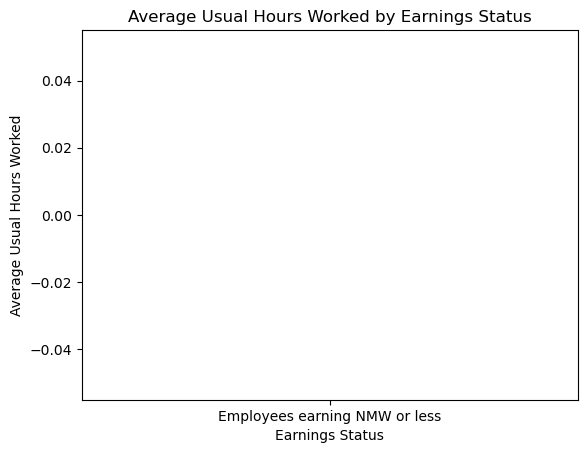

In [48]:
# Calculate the average usual hours worked by employees earning National Minimum Wage or less
average_hours_NMW = data[data['NMW earnings status (hours)'] == 'Employees reporting earning National Minimum Wage or less']['Usual Hours Worked'].mean()

# Calculate the average usual hours worked by employees earning more than National Minimum Wage
average_hours_more_than_NMW = data[data['NMW earnings status (hours)'] == 'Employees reporting earning more than National Minimum Wage']['Usual Hours Worked'].mean()

# Create a bar chart to visualize the average usual hours worked
categories = ['Employees earning NMW or less', 'Employees earning more than NMW']
average_hours = [average_hours_NMW, average_hours_more_than_NMW]

plt.bar(categories, average_hours, color=['red', 'blue'])
plt.xlabel('Earnings Status')
plt.ylabel('Average Usual Hours Worked')
plt.title('Average Usual Hours Worked by Earnings Status')
plt.show()